# CARBON DIOXIDE CONCENTRATION LEVELS

Exploratory analysis of the carbon dioxide dataset.

In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Importing data
co2 = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_co2.csv')
co2.head()

,Year,Month,CO2
0,1958,3,314.89
1,1958,4,314.98
2,1958,5,315.06
3,1958,6,315.14
4,1958,7,315.21


# Annual mean

In [43]:
# Calculating the mean for each year
co2_mean = co2.groupby('Year').mean()
co2_mean.head()

,Month,CO2
Year,,
1958,7.5,315.229000
1959,6.5,315.994167
1960,6.5,316.905000
1961,6.5,317.625000
1962,6.5,318.450000


In [44]:
# Making Year not an index
co2_mean.reset_index(inplace=True)
co2_mean.head()

,Year,Month,CO2
0,1958,7.5,315.229000
1,1959,6.5,315.994167
2,1960,6.5,316.905000
3,1961,6.5,317.625000
4,1962,6.5,318.450000


In [45]:
co2_mean = co2_mean[['Year', 'CO2']]
co2_mean.head()

,Year,CO2
0,1958,315.229000
1,1959,315.994167
2,1960,316.905000
3,1961,317.625000
4,1962,318.450000


In [46]:
# Saving annual mean dataset
co2_mean.to_csv('/Users/anna/data/climate-change/datasets/clean_co2_mean.csv', index=False)

## Plotting

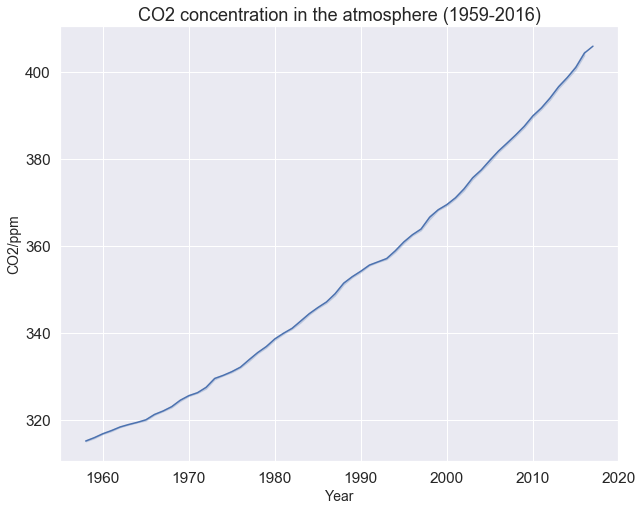

In [52]:
#Plotting annual mean dataset
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
sns.lineplot(x='Year', 
             y='CO2', 
             data=co2)
plt.title('CO2 concentration in the atmosphere (1959-2016)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2/ppm', fontsize=14)
plt.show()

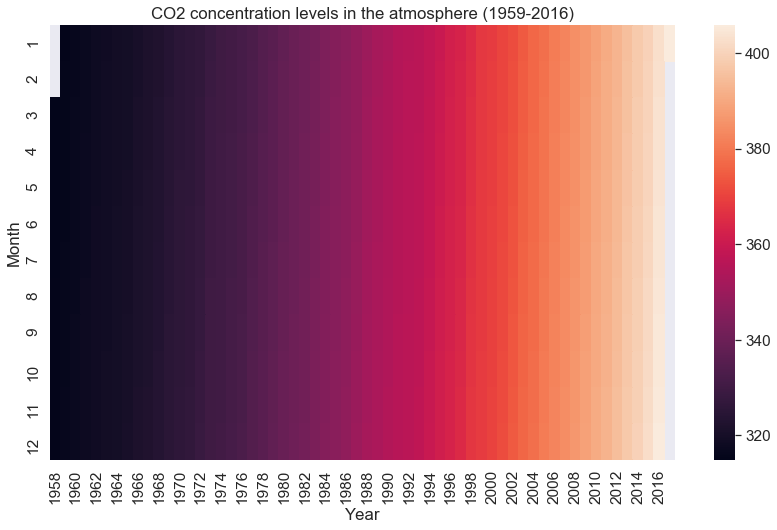

In [48]:
sns.set(font_scale=1.4)
plt.figure(figsize=(14, 8))
co2_hm = co2.pivot("Month", "Year", "CO2")
ax = sns.heatmap(co2_hm)
ax.set_title('CO2 concentration levels in the atmosphere (1959-2016)')
plt.show()

In [54]:
co2.isna().sum()

Year     0
Month    0
CO2      0
dtype: int64

The grey patches are not NaN vaues on the dataset as expected, since we had already removed them, it is just missing information for those months, so let's remove them to only work with years with information available for all the months.

In [65]:
co2 = co2[(co2['Year'] > 1958) & (co2['Year'] < 2016)]
co2.head()

,Year,Month,CO2
10,1959,1,315.57
11,1959,2,315.63
12,1959,3,315.69
13,1959,4,315.76
14,1959,5,315.84


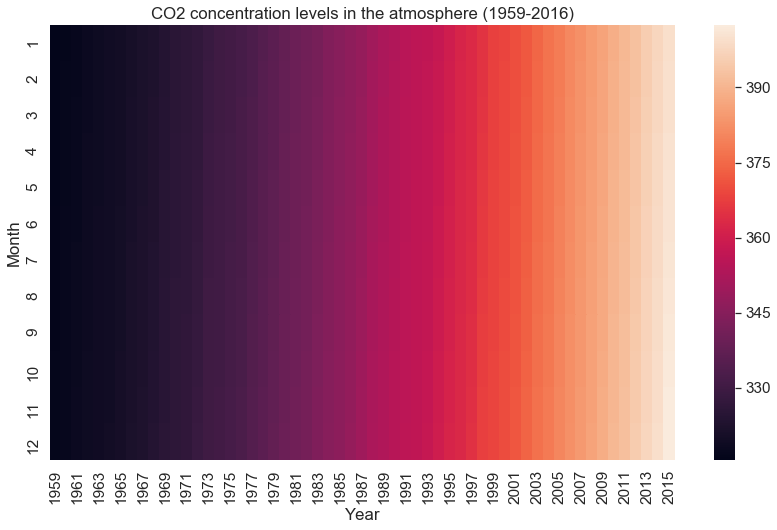

In [66]:
sns.set(font_scale=1.4)
plt.figure(figsize=(14, 8))
co2_hm = co2.pivot("Month", "Year", "CO2")
ax = sns.heatmap(co2_hm)
ax.set_title('CO2 concentration levels in the atmosphere (1959-2016)')
plt.show()

# Results

From the lineplot of the carbon dioxide cocentration levels we see a positive tendency, increasing with time.

In the heatmap we see that when we look at the global data, every year the concentration of CO2 levels in the atmosphere increases, but if we try to look to small chunk of the data,for example in the same year, the difference is too small to be perceives. This is a problem to try to communicate the importance of the topic to society because we don't see things changing in our daily basis, only if we look backwards or make predictions for the future.